# 문제풀이 Overview

* 이번 문제풀이에서는 이커머스 데이터를 이용해 주문 금액을 분석합니다.
* 문제를 본격적으로 풀기 전에 아래 코드를 실행해 `pandas` 라이브러리를 임포트하고 데이터를 읽어와주세요.

In [ ]:
import pandas as pd

In [ ]:
order_details = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/e-commerce/order_details.csv')

# 데이터 설명

> `order_details`는 이커머스의 주문 상세 내역이 담겨 있는 테이블 입니다.



**컬럼 상세** 

모든 금액의 단위는 설명의 편의를 위해 '1달러'로 통일합니다.
 * `Order ID`: 주문 ID
 * `Amount`: 총 주문 금액
 * `Profit`: 판매 수익
 * `Quantity`: 주문량
 * `Category`: 상품 카테고리
 * `Sub-Category`: 세부 카테고리 


참고: https://www.kaggle.com/benroshan/ecommerce-data/version/2?select=Order+Details.csv


# 데이터 미리보기

In [ ]:
order_details.head(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,(1148),7,Furniture,Bookcases
1,B-25601,66,(12),5,Clothing,Stole
2,B-25601,8,(2),3,Clothing,Hankerchief
3,B-25601,80,(56),4,Electronics,Electronic Games
4,B-25602,168,(111),2,Electronics,Phones


# Q1. 탐색적 데이터 분석 
[탐색적 데이터 분석(EDA, Exploratory Data Analysis)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)이란 본격적인 데이터 분석을 시작하기 전에, 그래프나 기초 통계를 이용하여 주어진 자료를 파악하는 과정입니다.

`order_details`에는 어떤 주문 데이터가 들어있을까요? <br> 데이터는 몇 개인지, 어떤 컬럼들이 있는지, 중복된 값은 없는지 등 `describe()`, `unique()` 등을 이용하여 자유롭게 살펴보세요.

<br>

**아래의 간단한 질문들에 답하며 EDA를 시작해 볼까요?**
* `order_details`에는 몇 개의 데이터가 있나요?
* ***카테고리와 서브 카테고리에는 어떤 것들이 있나요?***

In [ ]:
# Answer 1. 1500개의 데이터가 있음
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   object
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
dtypes: int64(2), object(4)
memory usage: 70.4+ KB


# Q2. 주문 1건 당 주문 금액 분석

주문 건 당 주문 금액이 너무 적으면 배송 부담이 높아지고, 주문 1건 당 관리 비용이 올라가는 등 가변 비용이 증가하기 때문에 최대한 한 번의 주문에 많이 사도록 만들고 싶습니다. 일단 현황 파악이 필요합니다.

### Step 1. 주문 별로 주문금액, 주문량 합산하기 

주문 별로 주문금액(`Amount`), 주문량(`Quantity`)을 구하고 `orders`라는 데이터 프레임에 저장하세요. 

* Output 예시

| Order ID   |   Amount |   Quantity |
|:-----------|---------:|-----------:|
| B-25601    |     1429 |         19 |
| B-25602    |     3889 |         22 |
| B-25603    |     2025 |         25 |
| B-25604    |      222 |         11 |
| B-25605    |       75 |          7 |

In [ ]:
# Answer
orders = order_details.groupby(['Order ID'])['Amount','Quantity'].sum()
orders

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Amount,Quantity
Order ID,,
B-25601,1429,19
B-25602,3889,22
B-25603,2025,25
B-25604,222,11
B-25605,75,7
...,...,...
B-26096,1091,18
B-26097,1688,23
B-26098,1189,21


### Step 2. 주문금액 통계 계산하기

앞 단계에서 주문 별 주문 금액을 계산했습니다. 예를 들어 Order Id `B-25601`번 주문은 1429달러어치 상품을 샀고, Order Id `B-25602`번 주문은 3889달러어치 상품을 샀습니다.

위에서 만든 데이터를 분석하여 아래 질문들에 답해주세요.
* 질문1: 현재 우리 쇼핑몰의 주문 1건당 평균 주문 금액은 얼마인가요? 
* 답변1: Amount(주문금액)의 mean인 863

* 질문2: 가장 주문 금액이 많았던 주문의 주문 번호와 주문 금액을 알려주세요.
* 답변2: 주문번호: B-26055 	/ 주문금액: 8502달러


* 질문3: 가장 주문 금액이 적었던 주문의 주문 번호와 주문 금액을 알려주세요.
* 답변3: 주문번호:B-26095	/ 주문금액: 6달러

In [ ]:
# Answer 1. 
orders.describe()

,Amount,Quantity
count,500.000000,500.00000
mean,863.004000,11.23000
std,1103.278652,10.11344
min,6.000000,1.00000
25%,123.750000,3.00000
50%,416.500000,8.00000
75%,1245.250000,16.00000
max,8502.000000,57.00000


In [ ]:
# Answer 2.
max = orders['Amount'].max()
orders[orders['Amount']==max]

,Amount,Quantity
Order ID,,
B-26055,8502,57


In [ ]:
# Answer 3.
min = orders['Amount'].min()
orders[orders['Amount']==min]

,Amount,Quantity
Order ID,,
B-26095,6,1


### Step 3. 주문 금액의 분포 그리기

우리는 보통 숫자들이 정규 분포 할 것을 생각하고 '평균'이라는 통계값에 의미를 둡니다. 분포의 중앙에 평균이 있고(아래 그래프에서 x축 중앙의 `μ`가 평균), 평균 근처에 많은 값들이 몰려 있으므로 이 '평균'이라는 숫자가 전체를 대표한다고 보는겁니다.

<div>
<img src="https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width="500"/>
</div>

그런데 실제 우리가 만나는 많은 데이터들은 정규분포와 거리가 멉니다. 

예를 들어, 사람들의 자산 그래프를 상상해봅시다. 우리는 소수의 굉장한 부자들이 전 세계 부의 많은 부분을 소유하고 나머지 부를 많은 사람들이 나눠가지고 있다는 것을 압니다. 이런 상황에서 인류 자산의 평균이라는 숫자가 우리 모두의 자산을 반영하는 대표값이 될 수 있을까요? 아마 아닐겁니다.

우리의 주문 데이터(`orders`)는 어떨까요? 평균 863달러 근처에 많은 데이터들이 몰려있는 정규분포 모양을 그릴까요? 아니면, 인류의 자산 분포 처럼 대부분의 주문은 적은 금액에 몰려있고 소수의 높은 주문 금액이 있는 형태를 보일까요? 주문 금액 분포를 봤을 때, 평균 863달러는 어떤 의미를 가지나요?

Hint. 데이터의 분포를 확인하기 위해 판다스의 히스토그램 그리는 함수([`pandas.DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)), 또는 `describe()` 함수를 활용하세요.

In [ ]:
# Answer
orders['Amount'].describe()

count     500.000000
mean      863.004000
std      1103.278652
min         6.000000
25%       123.750000
50%       416.500000
75%      1245.250000
max      8502.000000
Name: Amount, dtype: float64

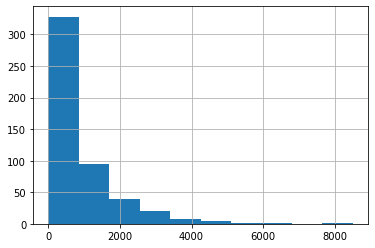

In [ ]:
orders['Amount'].hist()

Amount의 평균 863은 데이터를 대표한다고 볼 수 없다.
이 경우에는 사분위수 등 다른 통계값을 의사결정에 활용해야 한다.

# Q3. 여러분의 분석 아이디어를 들려주세요

여러분들의 분석 내용을 인프런 블로그 또는 개인 블로그에 `#데이터리안` `#판다스공부` `#TIL` 해시태그로 공유해주세요! `velog.io`, `brunch`, `medium` 등 개인 블로그에 올리신 분들은 인프런 블로그로 링크를 올려주시면 저희가 검색해서 찾아갈 수 있을 것 같아요.

분석 내용 뿐 아니라 노트북 자체를 공유하고 싶은 분들은 아래 예시를 참고해주세요.
* [nbviewer 예시](https://nbviewer.jupyter.org/github/dataitgirls3/Teaching-Materials/blob/master/2019-09-09%20Pandas%20%EC%88%98%EC%97%85%20%EB%B3%B4%EC%B6%A9%EC%9E%90%EB%A3%8C.ipynb)
* [github 예시](https://github.com/dataitgirls3/Teaching-Materials/blob/master/Comprehension.ipynb)

인프런 블로그에 올리실 때 `#데이터리안` `#판다스공부` 해시태그 다는거 잊지 말아주세요!

In [ ]:
# 추가 분석

# 수고하셨습니다!
> 섹션 5에서 만나요!